In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Load the data
df = pd.read_csv('../data/Viral_Social_Media_Trends_Cleaned.csv')

In [38]:
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376


## Palette

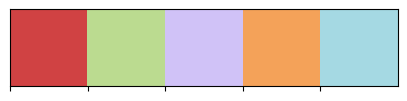

In [39]:
palette = ['#d04243', '#BBDB90', '#d0c2f7', '#f4a259', '#A5D9E3']
sns.palplot(sns.color_palette(palette))

my_colors = ListedColormap(sns.color_palette(palette))

## General Idea of the Data

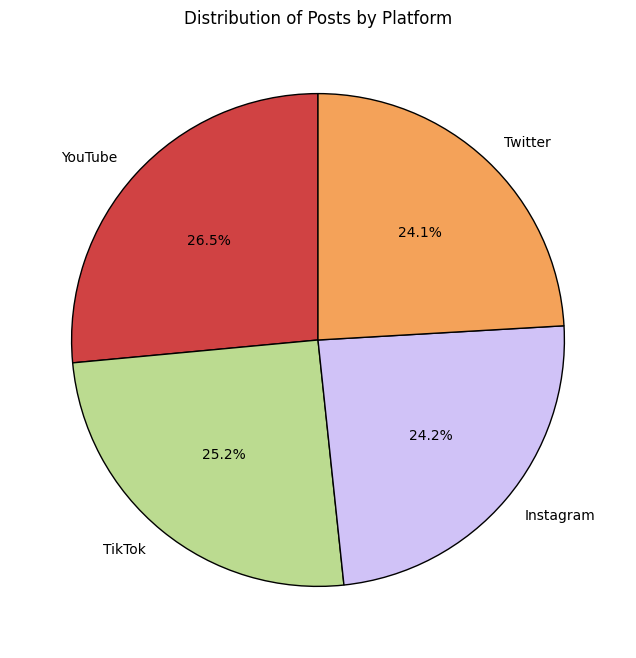

In [40]:
# Pie chart of Platforms
platform_counts = df['Platform'].value_counts()

plt.figure(figsize=(8, 8))
platform_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=palette,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Distribution of Posts by Platform')
plt.ylabel('')  # Remove y-axis label for better appearance
plt.show()

/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_11357/2602033231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/jv/m28dc0910xgbzzt8gj8r_vlm0000gp/T/ipykernel_11357/2602033231.py:3: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


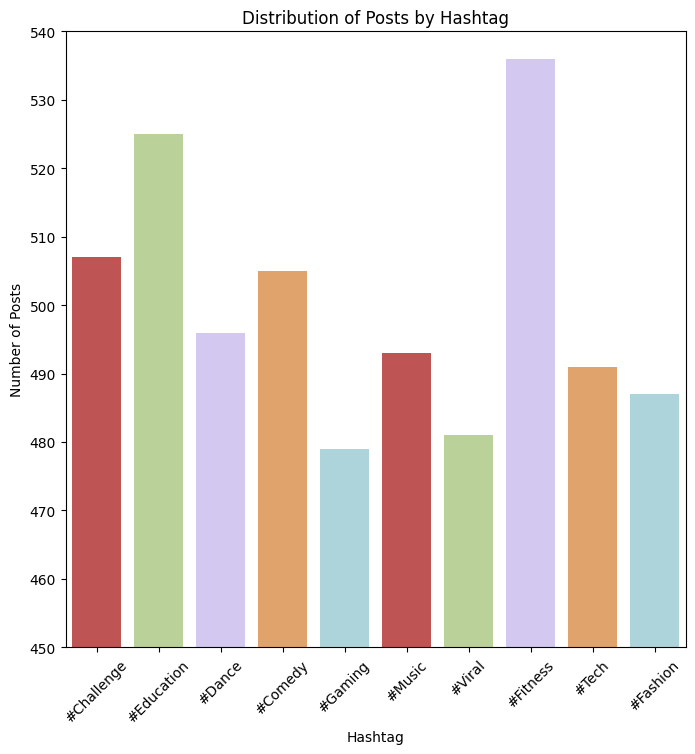

In [41]:
plt.figure(figsize=(8, 8))

sns.countplot(
    data=df,
    x='Hashtag',
    palette=palette
)

plt.xticks(rotation=45)
plt.title('Distribution of Posts by Hashtag')
plt.xlabel('Hashtag')
plt.ylabel('Number of Posts')
plt.ylim(450, 540)

plt.show()
